In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('Solar_Prediction.csv')
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
1,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
2,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
3,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
4,1475227824,9/29/2016 12:00:00 AM,23:30:24,1.21,48,30.46,64,120.20,5.62,06:13:00,18:13:00


In [3]:
data.info() #checking for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32685 entries, 0 to 32684
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32685 non-null  int64  
 1   Data                    32685 non-null  object 
 2   Time                    32685 non-null  object 
 3   Radiation               32685 non-null  float64
 4   Temperature             32685 non-null  int64  
 5   Pressure                32685 non-null  float64
 6   Humidity                32685 non-null  int64  
 7   WindDirection(Degrees)  32685 non-null  float64
 8   Speed                   32685 non-null  float64
 9   TimeSunRise             32685 non-null  object 
 10  TimeSunSet              32685 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [4]:
data.describe() #checking for outliers

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268500e+04,32685.000000,32685.000000,32685.000000,32685.000000,32685.000000,32685.000000
mean,1.478047e+09,207.130997,51.103350,30.422878,75.016797,143.488784,6.243888
std,3.005042e+06,315.919167,6.201228,0.054674,25.990465,83.168561,3.490525
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475547e+09,1.230000,46.000000,30.400000,56.000000,82.220000,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.240000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [5]:
data.isnull().any() #checking for missing values

UNIXTime                  False
Data                      False
Time                      False
Radiation                 False
Temperature               False
Pressure                  False
Humidity                  False
WindDirection(Degrees)    False
Speed                     False
TimeSunRise               False
TimeSunSet                False
dtype: bool

## Trim the dataset to the columns we need for the Random forest

In [6]:
data1 = data.drop(['UNIXTime','Data','Time',"TimeSunRise", "TimeSunSet"], axis=1) #dropping columns that are not needed for the model

data1.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,1.21,48,30.46,58,176.78,3.37
1,1.23,48,30.46,57,158.75,3.37
2,1.21,48,30.46,60,137.71,3.37
3,1.17,48,30.46,62,104.95,5.62
4,1.21,48,30.46,64,120.20,5.62


In [7]:
data1.describe()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,32685.000000,32685.000000,32685.000000,32685.000000,32685.000000,32685.000000
mean,207.130997,51.103350,30.422878,75.016797,143.488784,6.243888
std,315.919167,6.201228,0.054674,25.990465,83.168561,3.490525
min,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.230000,46.000000,30.400000,56.000000,82.220000,3.370000
50%,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,354.240000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32685 entries, 0 to 32684
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Radiation               32685 non-null  float64
 1   Temperature             32685 non-null  int64  
 2   Pressure                32685 non-null  float64
 3   Humidity                32685 non-null  int64  
 4   WindDirection(Degrees)  32685 non-null  float64
 5   Speed                   32685 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 1.5 MB


## PERFORMING EDA To understand the structure, distribution, and relationships in your dataset. 

## Generating a Scatter Plot to check all feature relationship with [RADIATION]

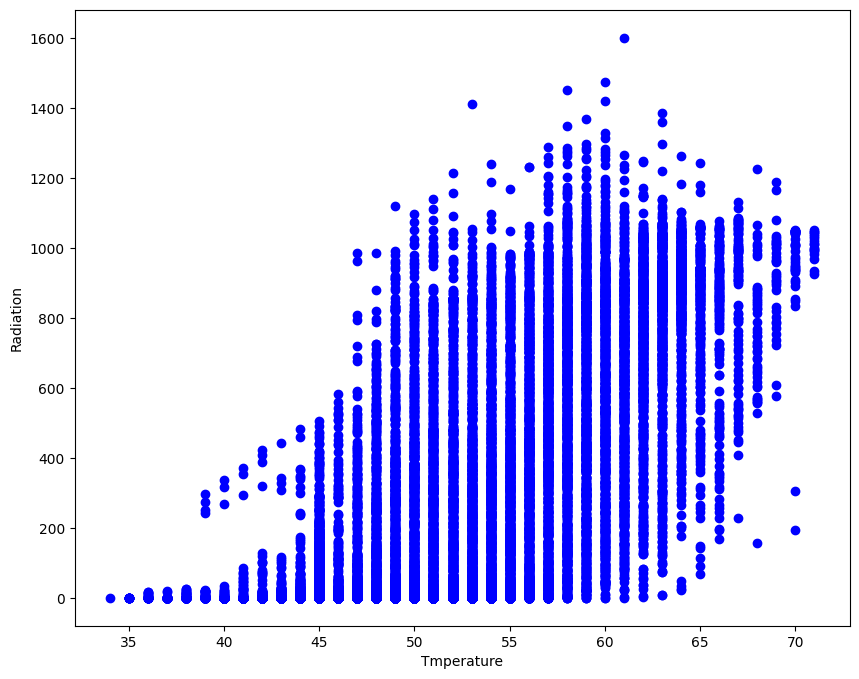

In [9]:
plt.figure(figsize=(10, 8))
plt.scatter(data1["Temperature"], data1["Radiation"], color='blue')
plt.xlabel("Tmperature")
plt.ylabel("Radiation")
plt.show()

## Pressure vs Radiation

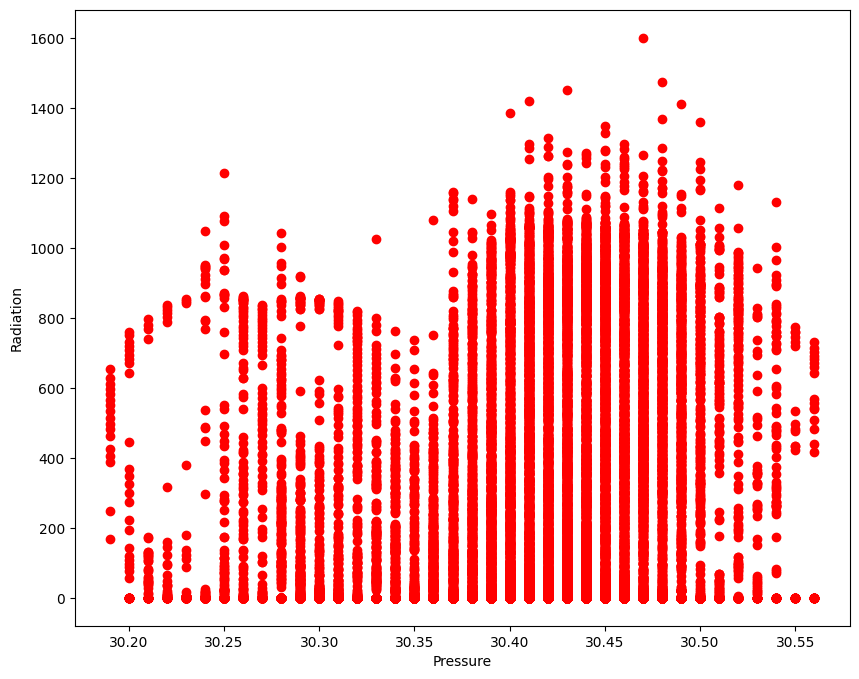

In [10]:
plt.figure(figsize=(10, 8))
plt.scatter(data1["Pressure"], data1["Radiation"], color='red')
plt.xlabel("Pressure")
plt.ylabel("Radiation")
plt.show()

## Humidity vs Radiation

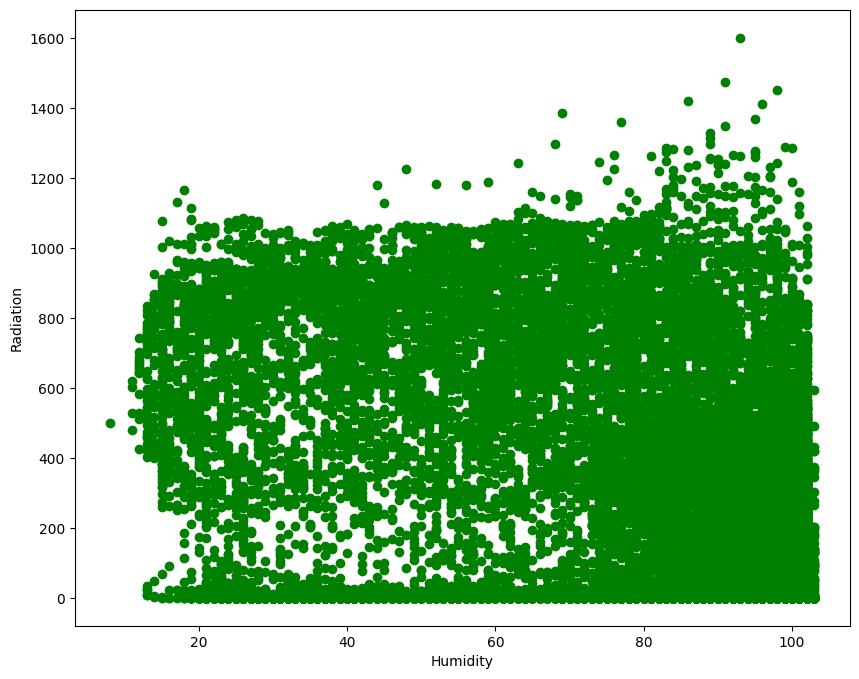

In [11]:
plt.figure(figsize=(10, 8))
plt.scatter(data1["Humidity"], data1["Radiation"], color='green')
plt.xlabel("Humidity")
plt.ylabel("Radiation")
plt.show()


## Wind Direction vs Radiation

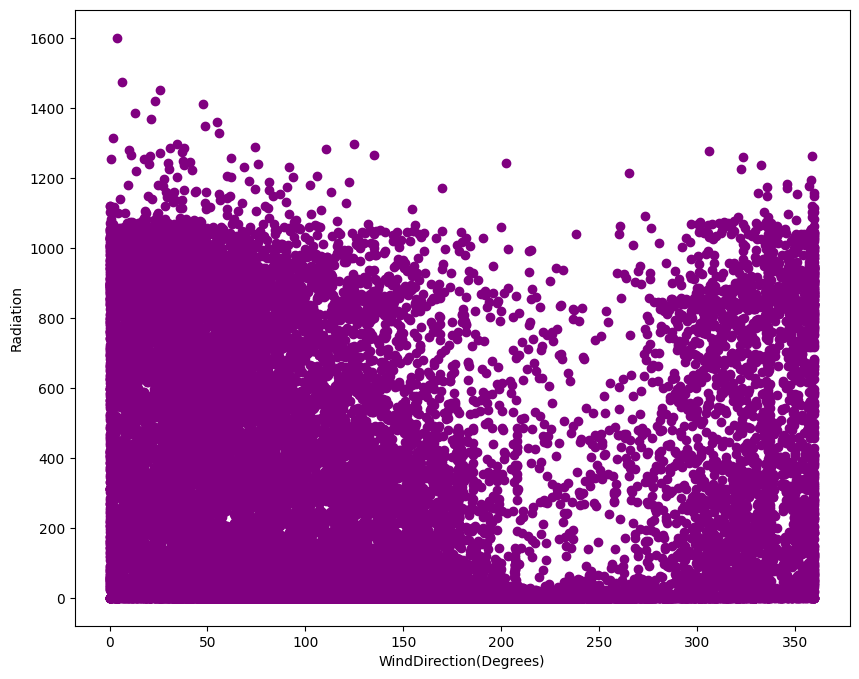

In [12]:
plt.figure(figsize=(10, 8))
plt.scatter(data1["WindDirection(Degrees)"], data1["Radiation"], color='purple')
plt.xlabel("WindDirection(Degrees)")
plt.ylabel("Radiation")
plt.show()

## FINDING THE CORRELATION BETWEEN THE SELECTED COLUMNS 

Text(0.5, 1.0, 'Correlation Matrix of DATA1')

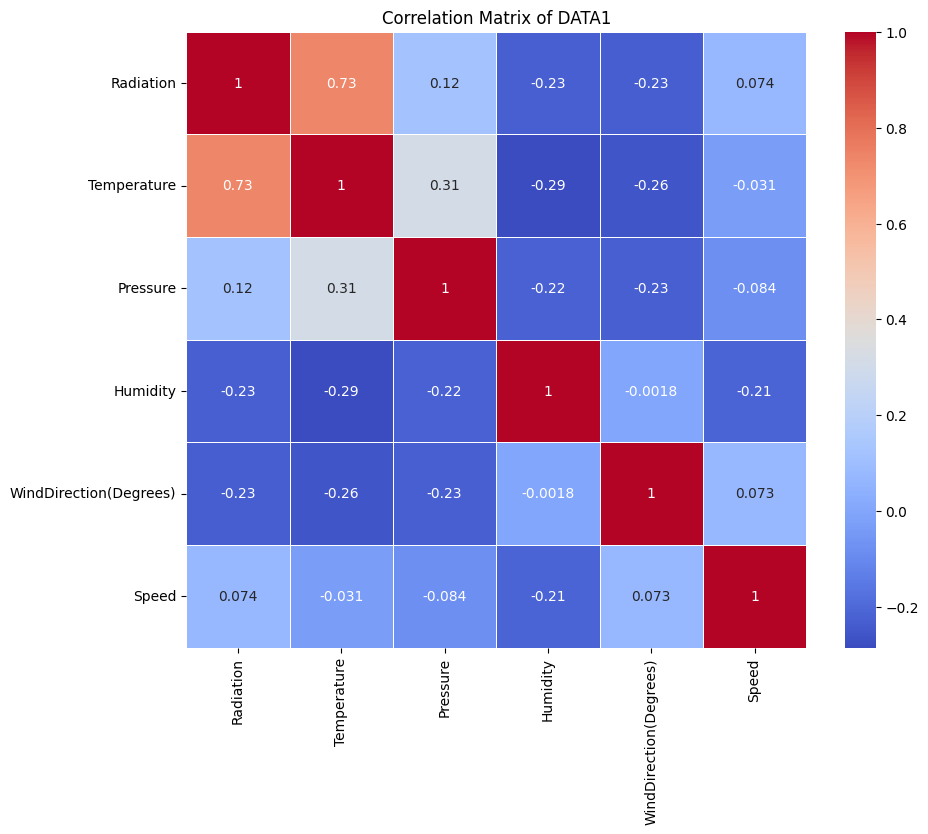

In [13]:
# Correlation Matrix of the data
plt.figure(figsize=(10, 8))
corr_matrix = data1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of DATA1')

### Key Insights from the Matrix

    Temperature has the highest correlation with solar radiation (0.73), so it’s likely a key feature for your model.
    Other features like Pressure, Humidity, and Wind Direction show weaker correlations, so they may not be as predictive of solar radiation in this dataset.
    This matrix helps you prioritize which features to include in your model. Features with low or no correlation to solar radiation may have limited value in predicting it.

## Check Target Distribution (Solar Radiation)

Text(0, 0.5, 'Density')

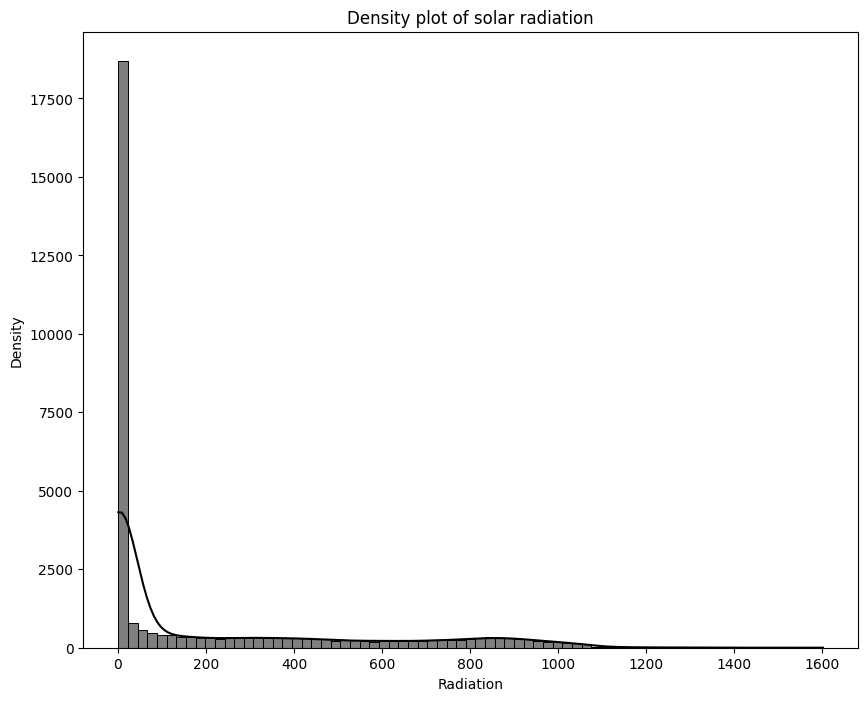

In [14]:

plt.figure(figsize=(10, 8))
sns.histplot(data1['Radiation'], kde=True, color='black')
plt.title('Density plot of solar radiation')
plt.xlabel('Radiation')
plt.ylabel('Density')

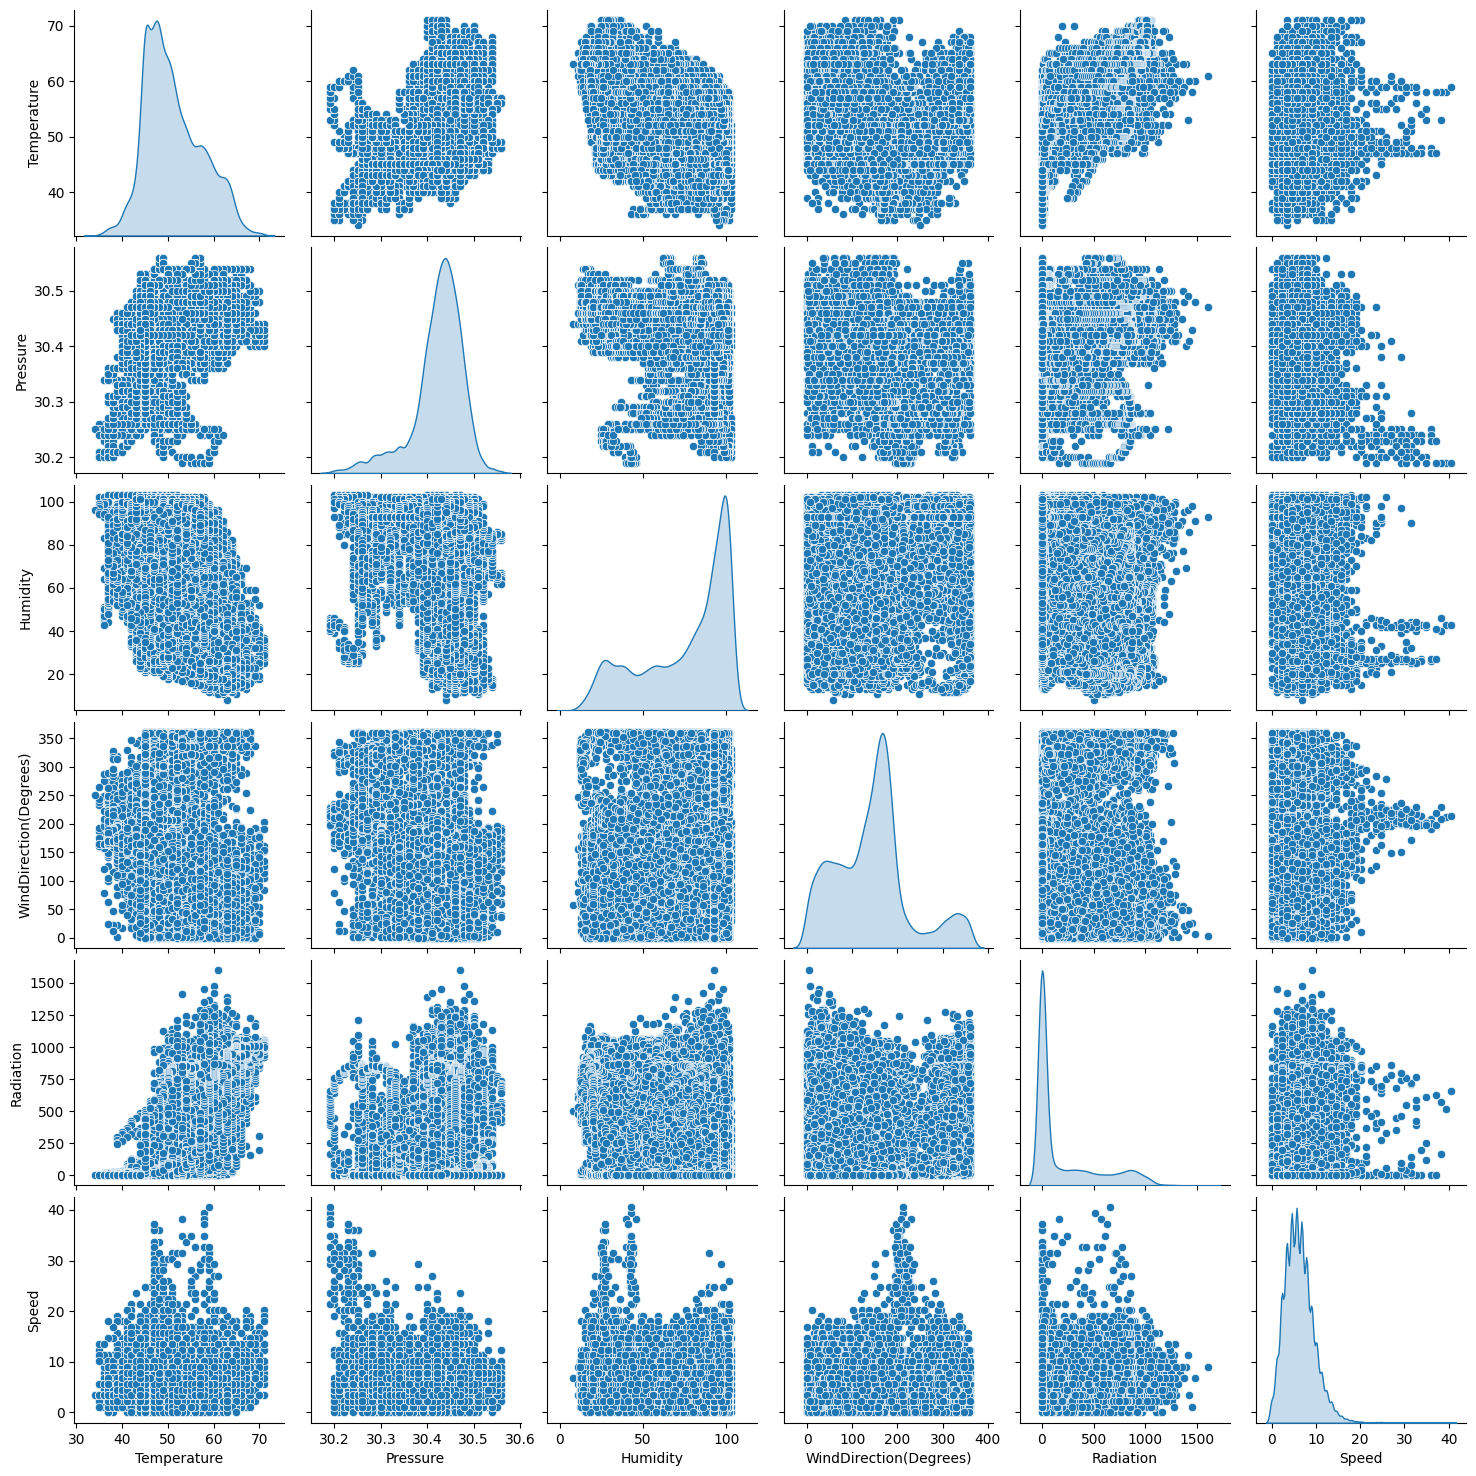

In [15]:
# Pair plot for selected features
sns.pairplot(data1[['Temperature', "Pressure",'Humidity', 'WindDirection(Degrees)', 'Radiation', "Speed"]], diag_kind='kde')
plt.show()


In [16]:
# Separate features and target variable
X = data1.drop(columns=['Radiation'])  # 'Radiation' is the target what we are trying to predict here 
y = data1['Radiation']

X # Radiation has been dropped because "X" is the Independent Variable
# y is the dependent variable

# or "X" can be defined as the input features
# y can be defined as the target variable or the output

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,48,30.46,58,176.78,3.37
1,48,30.46,57,158.75,3.37
2,48,30.46,60,137.71,3.37
3,48,30.46,62,104.95,5.62
4,48,30.46,64,120.20,5.62
...,...,...,...,...,...
32680,44,30.43,102,145.42,6.75
32681,44,30.42,102,117.78,6.75
32682,44,30.42,102,145.19,9.00
32683,44,30.42,101,164.19,7.87


## Divide the dataset into training and testing sets to evaluate the model’s performance.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Initialize Models

Choose multiple models that support feature importance calculation. Here, we’ll use:

    Random Forest Regressor - MODEL 1
    Decision Tree Regressor - MODEL 2
    Gradient Boosting Regressor MODEL 3

## Initialize the model ...in this case Random Forest : MODEL 1

In [18]:
model1 = RandomForestRegressor(random_state=42)



## Initialize the model ...in this case DECISION TREE Regressor : MODEL 2

In [19]:
model2 = DecisionTreeRegressor(random_state=42)

## Initialize the model ...in this case Gradient Boosting Regressor : MODEL 3

In [20]:
model3 = GradientBoostingRegressor(random_state=42)

## Looking at model's performance before i do the RFE Model : 1

In [ ]:
# Train the model on the selected features
model1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model1.predict(X_test)

# Evaluate the model performance
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Model Performance without selected Features:")
print("RMSE:", rmse)
print("R²:", r2)



Model Performance without selected Features:
RMSE: 160.36036030226413
R²: 0.740836211530008
[629.2437  841.4322    1.226   ... 143.67655  25.7568   65.3204 ]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Looking at model's performance before i do the RFE Model : 2

In [22]:
# Train the model on the selected features
model2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model2.predict(X_test)

# Evaluate the model performance
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Model Performance without selected Features:")
print("RMSE:", rmse)
print("R²:", r2)


Model Performance without selected Features:
RMSE: 224.40180346746757
R²: 0.4925036080421248


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Looking at model's performance before i do the RFE Model : 3

In [23]:
# Train the model on the selected features
model3.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model3.predict(X_test)

# Evaluate the model performance
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Model Performance without selected Features:")
print("RMSE:", rmse)
print("R²:", r2)


Model Performance without selected Features:
RMSE: 173.4997848955238
R²: 0.696626142002831


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Apply Recursive Feature Elimination (RFE)

In [24]:
# Initialize RFE with the model and the number of features you want to keep
n_features_to_select = 4  # Change this based on your preference or experiment
rfe_1 = RFE(estimator=model1, n_features_to_select=n_features_to_select)


## Fit RFE to the Training Data

In [25]:
# Fit RFE on training data
rfe_1.fit(X_train, y_train)


RFE(estimator=RandomForestRegressor(random_state=42), n_features_to_select=4)

## View the selected features 

### This will output the most important features for predicting solar radiation, based on the RFE process.

In [26]:
# Boolean mask of selected features
selected_features_mask = rfe_1.support_

# Get the list of selected feature names
selected_features = X_train.columns[selected_features_mask]
print("Selected Features:", selected_features)


Selected Features: Index(['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)'], dtype='object')


## Now trasform the data to use only selected important features by the RFE 

In [27]:
# Transform training and testing data
X_train_selected = rfe_1.transform(X_train)
X_test_selected = rfe_1.transform(X_test)


## Now retrain the model with selected features with regards to model 1

In [28]:
# Train the model on the selected features
model1.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model1.predict(X_test_selected)

# Evaluate the model performance
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Model Performance with Selected Features:")
print("RMSE:", rmse)
print("R²:", r2)


Model Performance with Selected Features:
RMSE: 163.08172407777104
R²: 0.7319653990306019


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Model Performance (RMSE and R²): You can compare this with the model’s performance before feature selection to see if using only the most important features has improved or maintained the model’s accuracy. Lower RMSE and higher R² values indicate better performance.

# WITH REGARDS TO MODEL 2 DECISION TREE REGRESSOR 


In [29]:
# Initialize RFE with the model and the number of features you want to keep
n_features_to_select = 4  # Change this based on your preference or experiment
rfe_2 = RFE(estimator=model2, n_features_to_select=n_features_to_select)

In [30]:
# Fit RFE on training data
rfe_2.fit(X_train, y_train)


RFE(estimator=DecisionTreeRegressor(random_state=42), n_features_to_select=4)

In [31]:
# Boolean mask of selected features
selected_features_mask = rfe_2.support_

# Get the list of selected feature names
selected_features = X_train.columns[selected_features_mask]
print("Selected Features:", selected_features)


Selected Features: Index(['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)'], dtype='object')


In [32]:
# Transform training and testing data
X_train_selected = rfe_2.transform(X_train)
X_test_selected = rfe_2.transform(X_test)


In [33]:
# Train the model on the selected features
model2.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model2.predict(X_test_selected)

# Evaluate the model performance
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Model Performance with Selected Features:")
print("RMSE:", rmse)
print("R²:", r2)


Model Performance with Selected Features:
RMSE: 226.82110656751445
R²: 0.48150185993809214


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(




Choose multiple models that support feature importance calculation. Here, we’ll use:

    Random Forest Regressor - MODEL 1  This is the best
    Decision Tree Regressor - MODEL 2   Not advisable to use in this case 
    Gradient Boosting Regressor MODEL 3 Followed By this

## Feature importance 


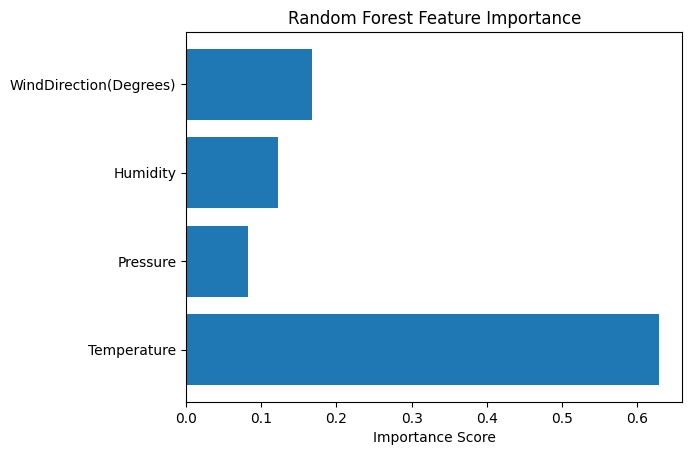

In [35]:
# Calculate feature importance scores for Random Forest
rf_importance = model1.feature_importances_

# Use the selected features for plotting
selected_features = X_train.columns[selected_features_mask]

# Plot the feature importance
plt.barh(selected_features, rf_importance)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.show()

## Training the Random Forest Model

In [36]:
# Initialize the model with desired hyperparameters
model1 = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Fit the model to the training data
model1.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, random_state=42)

## Hyperparameter Tuning

In [37]:


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model1, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_


## Model Evaluation

In [38]:
from sklearn.metrics import mean_squared_error
y_pred = model1.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-Squared:", r2_score(y_test, y_pred))

Mean Absolute Error: 95.97672614457842
Mean Squared Error: 26515.887470881782
R-Squared: 0.7327692439373676


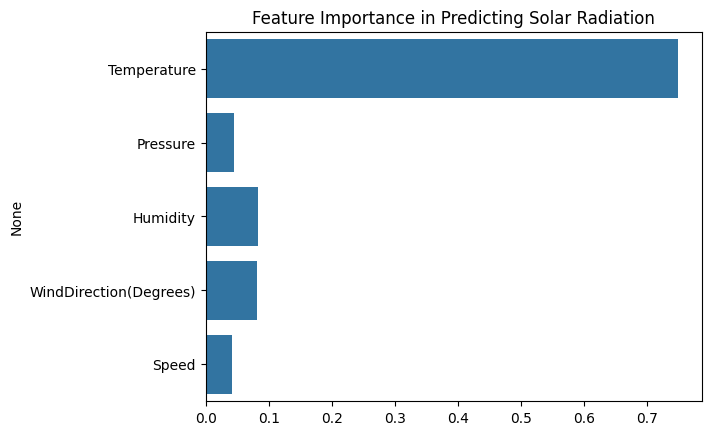

In [39]:


feature_importances = model1.feature_importances_
sns.barplot(x=feature_importances, y=X.columns)
plt.title("Feature Importance in Predicting Solar Radiation")
plt.show()


##  Make Predictions with New Data

In [ ]:

# new_data = [...]  # Your new weather data here
# predictions = model1.predict(new_data)
